In [145]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math
import seaborn
from sklearn.preprocessing import StandardScaler

In [146]:
dataset_train=pd.read_csv('../datasets/insurance_train.csv')
dataset_test=pd.read_csv('../datasets/insurance_test.csv')
dataset_train

,age,sex,bmi,children,smoker,region,charges
0,26,male,27.060,0,yes,southeast,17043.34140
1,58,male,36.955,2,yes,northwest,47496.49445
2,20,female,24.420,0,yes,southeast,26125.67477
3,51,female,38.060,0,yes,southeast,44400.40640
4,62,female,25.000,0,no,southwest,13451.12200
...,...,...,...,...,...,...,...
333,25,female,22.515,1,no,northwest,3594.17085
334,18,male,53.130,0,no,southeast,1163.46270
335,64,male,37.905,0,no,northwest,14210.53595
336,54,female,47.410,0,yes,southeast,63770.42801


In [147]:
print(dataset_train.isna().sum())
print(dataset_train.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [148]:
print(np.unique(dataset_train['sex']))
print(np.unique(dataset_train['children']))
print(np.unique(dataset_train['smoker']))
print(np.unique(dataset_train['region']))
print(dataset_train['bmi'].min())
print(dataset_train['bmi'].max())
print(dataset_train['charges'].min())
print(dataset_train['charges'].max())
print(dataset_train['age'].min())
print(dataset_train['age'].max())

['female' 'male']
[0 1 2 3 4 5]
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']
17.29
53.13
1121.8739
63770.42801
18
64


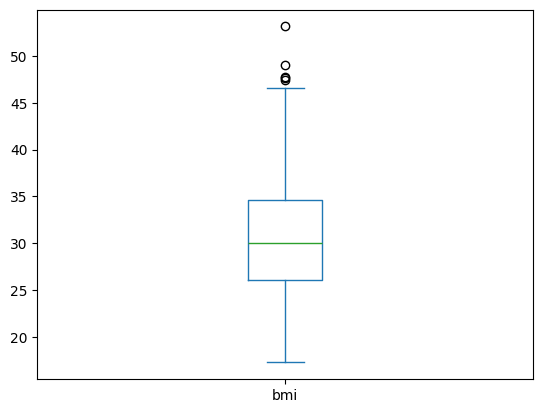

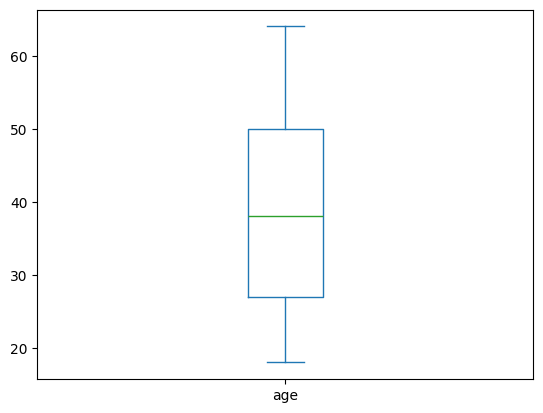

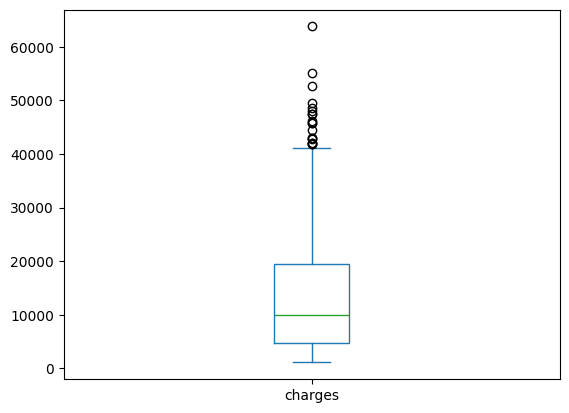

In [149]:
dataset_train['bmi'].plot.box()
plt.show()
dataset_train['age'].plot.box()
plt.show()
dataset_train['charges'].plot.box()
plt.show()

In [150]:
#num=dataset_train[['bmi','age','charges']]
#Q1=num.quantile(0.25)
#Q3=num.quantile(0.75)
#IQR=Q3-Q1
#lower=Q1-1.5*IQR
#upper=Q3+1.5*IQR
#mask=((num>=lower) & (num<=upper)).all(axis=1)
#dataset_train=dataset_train[mask]

In [151]:
dataset_train['sex']=dataset_train['sex'].replace({'female':1,'male':0})
dataset_train['sex']

C:\Users\user\AppData\Local\Temp\ipykernel_12864\2172862336.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_train['sex']=dataset_train['sex'].replace({'female':1,'male':0})


0      0
1      0
2      1
3      1
4      1
      ..
333    1
334    0
335    0
336    1
337    1
Name: sex, Length: 338, dtype: int64

In [152]:
dataset_train['smoker']=dataset_train['smoker'].replace({'yes':1,'no':0})
dataset_train['smoker']

C:\Users\user\AppData\Local\Temp\ipykernel_12864\1790113982.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_train['smoker']=dataset_train['smoker'].replace({'yes':1,'no':0})


0      1
1      1
2      1
3      1
4      0
      ..
333    0
334    0
335    0
336    1
337    0
Name: smoker, Length: 338, dtype: int64

In [153]:
region_columns=pd.get_dummies(dataset_train['region'], prefix='region',dtype=np.int64,drop_first=True)
dataset_train=dataset_train.drop('region',axis=1)
dataset_train=pd.concat((dataset_train,region_columns),axis=1)
dataset_train


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,26,0,27.060,0,1,17043.34140,0,1,0
1,58,0,36.955,2,1,47496.49445,1,0,0
2,20,1,24.420,0,1,26125.67477,0,1,0
3,51,1,38.060,0,1,44400.40640,0,1,0
4,62,1,25.000,0,0,13451.12200,0,0,1
...,...,...,...,...,...,...,...,...,...
333,25,1,22.515,1,0,3594.17085,1,0,0
334,18,0,53.130,0,0,1163.46270,0,1,0
335,64,0,37.905,0,0,14210.53595,1,0,0
336,54,1,47.410,0,1,63770.42801,0,1,0


In [154]:
dataset_train.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

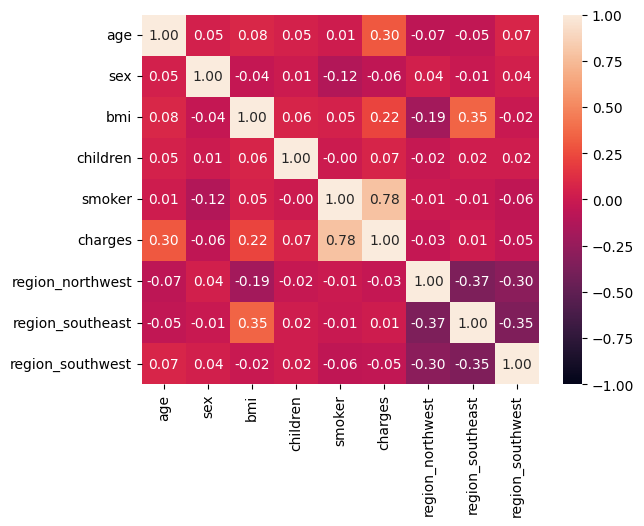

In [155]:
seaborn.heatmap(dataset_train.corr(numeric_only=True),vmin=-1,vmax=1,annot=True,fmt='.2f')
plt.show()

2.


In [156]:
Y_train=dataset_train['charges']
X_train=dataset_train.drop('charges',axis=1)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=np.hstack([X_train,np.ones((X_train.shape[0],1))])

In [157]:
Y_test=dataset_test['charges']
X_test=dataset_test
X_test['smoker']=X_test['smoker'].replace({'yes':1,'no':0})
X_test['sex']=X_test['sex'].replace({'female':1,'male':0})
X_0=(X_test['region']=='northwest').rename('region_northwest')
X_1=(X_test['region']=='southeast').rename('region_southeast')
X_2=(X_test['region']=='southwest').rename('region_southwest')
X_test=X_test.drop('region',axis=1)
X_test=pd.concat((X_test,X_0),axis=1)
X_test=pd.concat((X_test,X_1),axis=1)
X_test=pd.concat((X_test,X_2),axis=1)
X_test=X_test.drop('charges',axis=1)
X_test=scaler.transform(X_test)
X_test=np.hstack([X_test,np.ones((X_test.shape[0],1))])

C:\Users\user\AppData\Local\Temp\ipykernel_12864\1200855219.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['smoker']=X_test['smoker'].replace({'yes':1,'no':0})
C:\Users\user\AppData\Local\Temp\ipykernel_12864\1200855219.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['sex']=X_test['sex'].replace({'female':1,'male':0})


In [158]:
beta=np.dot(np.linalg.inv(X_train.T@X_train),X_train.T@Y_train)
print(beta)

[ 3495.76949182   327.42129485  2210.57176839   581.67513525
  9859.84555479   -85.25913065  -638.00136585  -601.39012784
 14092.8619242 ]


In [159]:
def mse(weights,X,Y):
    return ((X@weights-Y)**2).mean()
print(mse(beta,X_test,Y_test))

34216008.758829966


In [160]:
def fit_one(weights,Y,X,alpha):
    grad=X.T@(X@weights-Y)
    grad=grad*2/X.shape[0]
    return weights-alpha*grad
def fit(weights,Y,X,lr,batch_size,k):
    m=int(X.shape[0]/batch_size)
    for i in range(k):
        indices = np.random.permutation(X.shape[0])
        for j in range(m):
            weights=fit_one(weights,Y[indices[j*batch_size:j*batch_size+batch_size]],X[indices[j*batch_size:j*batch_size+batch_size]],lr)
    return weights
weights=np.zeros(X_train.shape[1])
weights[-1]=Y_train.mean()
weights=fit(weights,Y_train.to_numpy(),X_train,0.1,128,1000)
print(weights)
print(mse(weights,X_test,Y_test))

[ 3515.37366767   229.8445812   2327.31511105   618.14788116
  9969.23346102   -28.37026987  -686.87537629  -557.55713075
 14145.72875889]
34194649.19110676


In [161]:
my_lambda=0.1
beta_l=np.dot(np.linalg.inv(X_train.T@X_train-np.eye(X_train.shape[1])*my_lambda),X_train.T@Y_train)
print(beta_l)
print(mse(beta_l,X_test,Y_test))

[ 3496.69496567   327.8468493   2211.15115241   581.7717483
  9862.75570147   -85.34001821  -638.44011937  -601.65159169
 14097.03264392]
34218404.79902664


In [162]:
def fit_l_one(weights,Y,X,alpha,l):
    grad=X.T@(X@weights-Y)
    grad=grad*2/X.shape[0]
    grad+=2*l*weights
    return weights-alpha*grad
def fit_l(weights,Y,X,lr,batch_size,k,l):
    m=int(X.shape[0]/batch_size)
    for i in range(k):
        indices = np.random.permutation(X.shape[0])
        for j in range(m):
            weights=fit_l_one(weights,Y[indices[j*batch_size:j*batch_size+batch_size]],X[indices[j*batch_size:j*batch_size+batch_size]],lr,l)
    return weights
weights_l=np.zeros(X_train.shape[1])
weights_l[-1]=Y_train.mean()
weights_l=fit_l(weights_l,Y_train.to_numpy(),X_train,0.1,128,1000,my_lambda)
print(weights_l)
print(mse(weights_l,X_test,Y_test))

[ 3250.88762655    61.94940575  1860.29084843   617.10928497
  8881.3316289   -126.55349288  -404.35914936  -480.09481654
 12786.15020824]
35961280.04486582


In [163]:
weights_mean=np.zeros(X_train.shape[1])
weights_mean[-1]=Y_train.mean()
print(mse(weights_mean,X_test,Y_test))

141830094.35903943
